#LOAD DATASETS


In [1]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('/content/Train.csv')
test_data = pd.read_csv('/content/Test.csv')

# Display the first few rows of each dataset
print("Train Data:")
print(train_data.head())
print("\nTest Data:")
print(test_data.head())


Train Data:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium       

# Data Exploration & Cleaning

In [2]:
# Check the structure of the train data
print("Shape of Train Data:", train_data.shape)
print("Columns in Train Data:", train_data.columns)
print("Data Types:\n", train_data.dtypes)
print("\nSummary Statistics:\n", train_data.describe())


Shape of Train Data: (8523, 12)
Columns in Train Data: Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
Data Types:
 Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Summary Statistics:
        Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645  

2.2 Check for Missing Values


In [3]:
# Check for missing values in the train dataset
missing_data = train_data.isnull().sum()
print("Missing values in Train Data:\n", missing_data)


Missing values in Train Data:
 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [5]:
# Handle missing values for 'Item_Weight' by filling with the median
train_data['Item_Weight'].fillna(train_data['Item_Weight'].median(), inplace=True)

# Handle missing values for 'Outlet_Size' by filling with the mode
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0], inplace=True)

# Verify if missing values have been handled
missing_data_after = train_data.isnull().sum()
print("Missing values after handling:\n", missing_data_after)


Missing values after handling:
 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


<ipython-input-5-0b27a755b46d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Item_Weight'].fillna(train_data['Item_Weight'].median(), inplace=True)
<ipython-input-5-0b27a755b46d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

2.3 Handle Duplicates

In [6]:
# Check for duplicate rows
duplicates = train_data.duplicated().sum()
print(f"Number of duplicate rows in Train Data: {duplicates}")


Number of duplicate rows in Train Data: 0


#Exploratory Data Analysis (EDA)


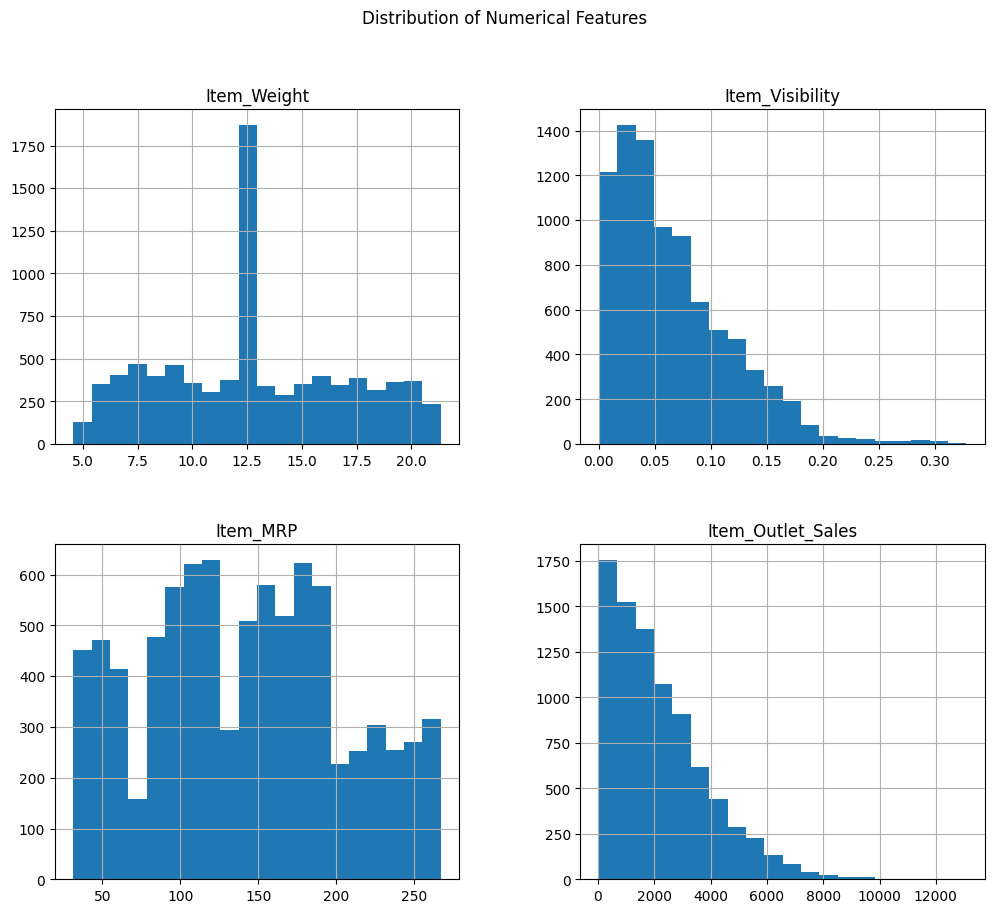

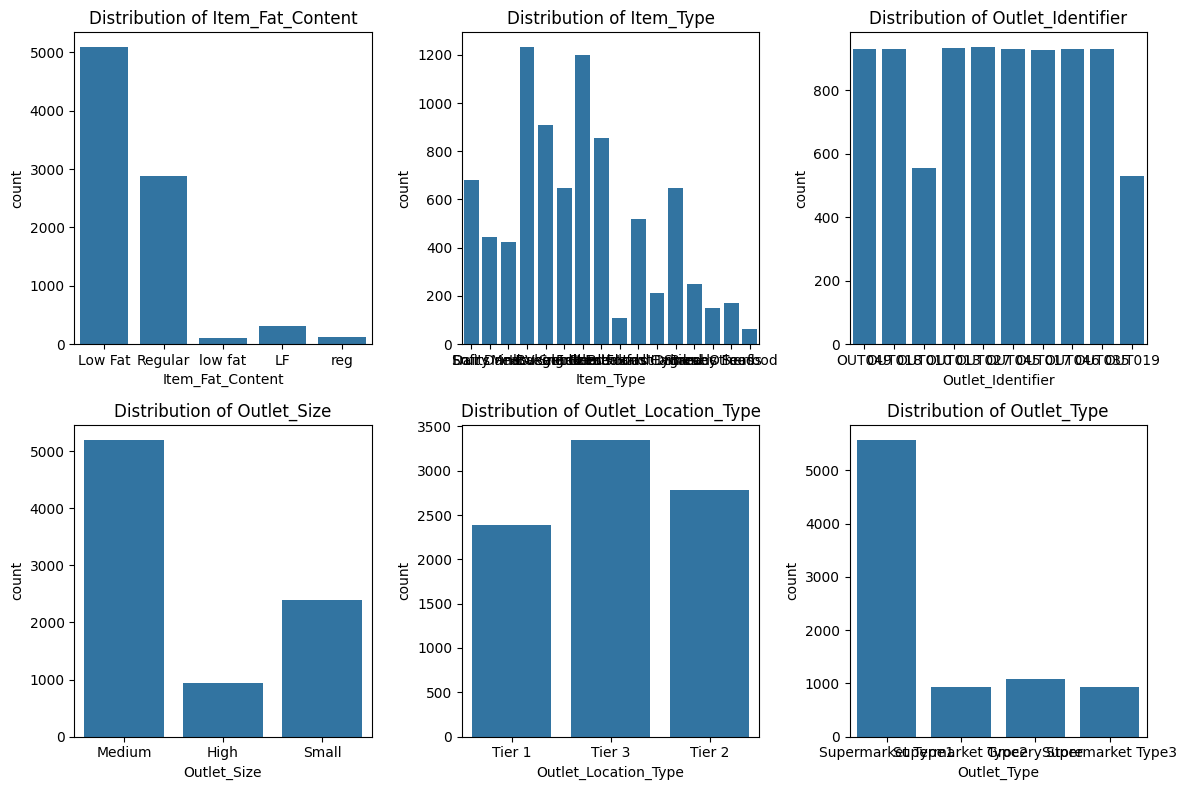

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of numerical features
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
train_data[numerical_columns].hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Plot distribution of categorical features
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
plt.figure(figsize=(12, 8))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=train_data, x=column)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


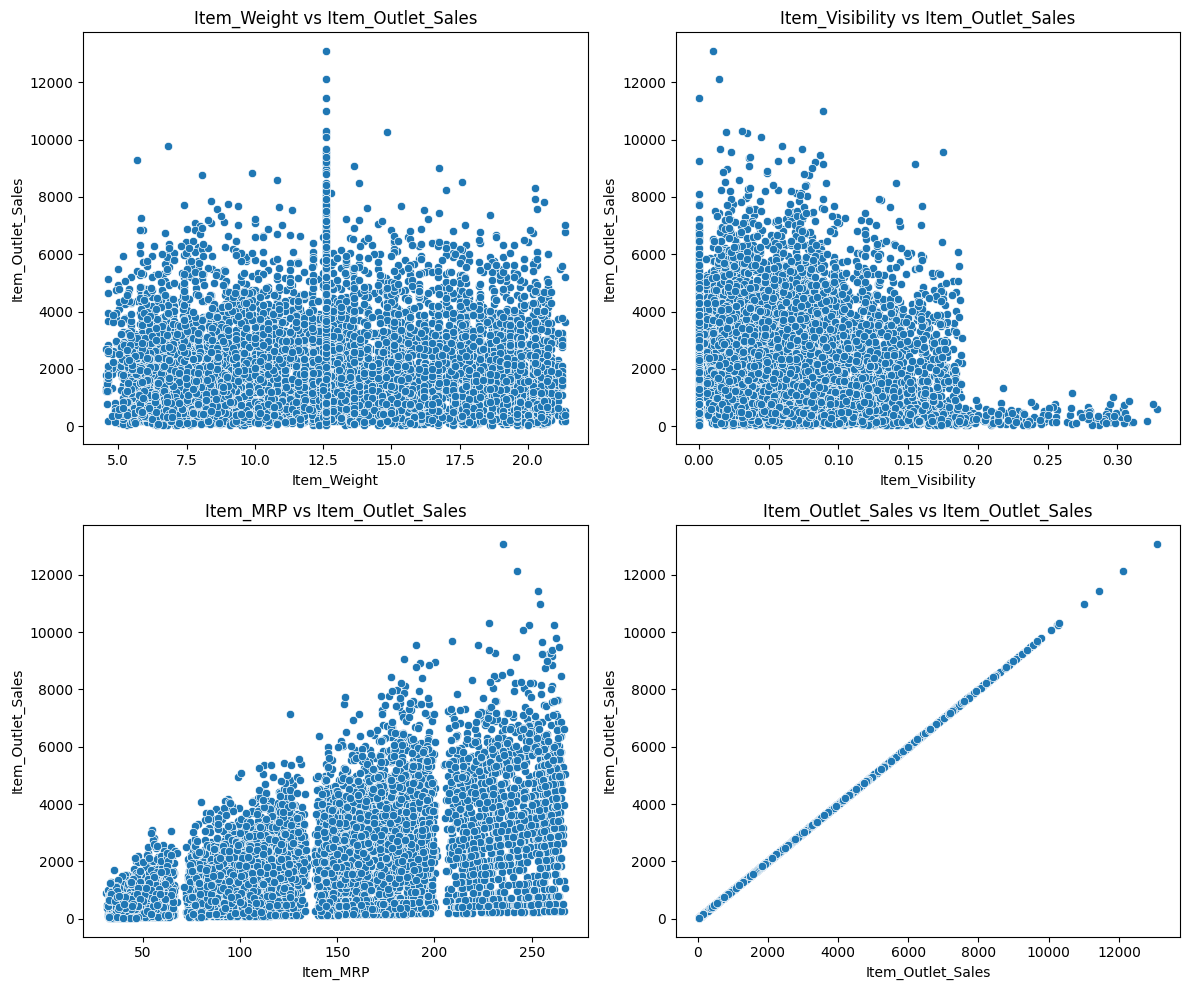

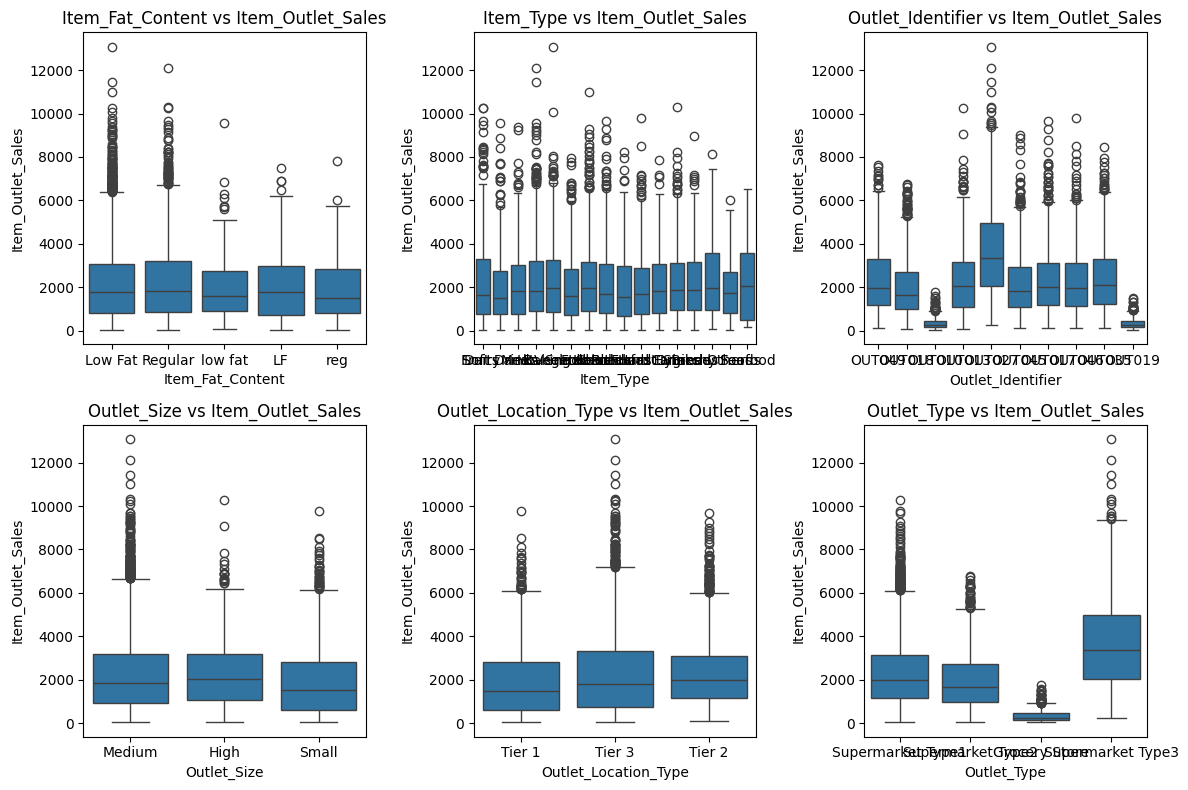

In [8]:
# Scatter plot of numerical features vs. Item_Outlet_Sales
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=train_data, x=column, y='Item_Outlet_Sales')
    plt.title(f'{column} vs Item_Outlet_Sales')
plt.tight_layout()
plt.show()

# Box plot of categorical features vs. Item_Outlet_Sales
plt.figure(figsize=(12, 8))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=train_data, x=column, y='Item_Outlet_Sales')
    plt.title(f'{column} vs Item_Outlet_Sales')
plt.tight_layout()
plt.show()


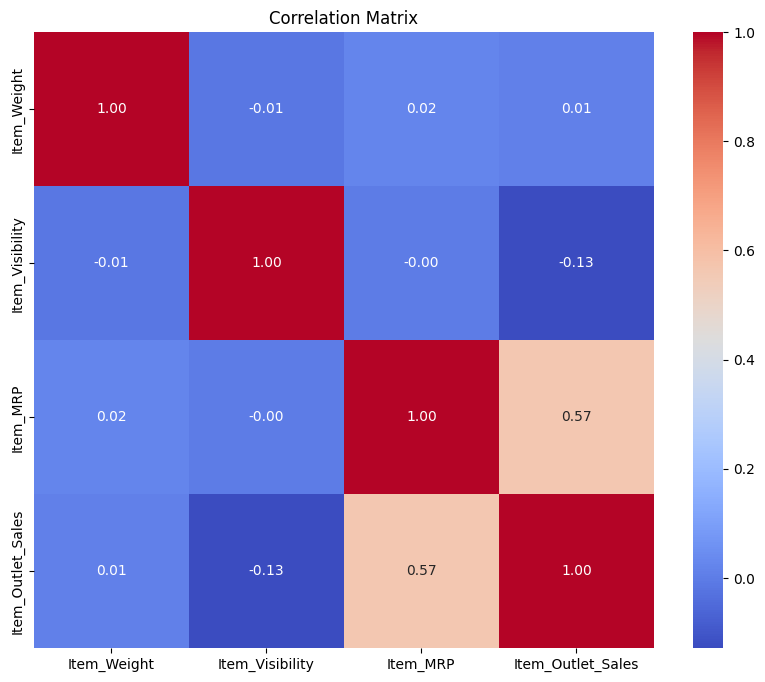

In [9]:
# Compute correlation matrix
correlation_matrix = train_data[numerical_columns].corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


#Feature Engineering

In [10]:
# One-Hot Encoding for categorical variables
train_data = pd.get_dummies(train_data, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
                                                  'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=True)


In [13]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = train_data.drop('Item_Outlet_Sales', axis=1)  # Features
y = train_data['Item_Outlet_Sales']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
print(X.dtypes)

Item_Identifier                      int64
Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Fat_Content_Low Fat              bool
Item_Fat_Content_Regular              bool
Item_Fat_Content_low fat              bool
Item_Fat_Content_reg                  bool
Item_Type_Breads                      bool
Item_Type_Breakfast                   bool
Item_Type_Canned                      bool
Item_Type_Dairy                       bool
Item_Type_Frozen Foods                bool
Item_Type_Fruits and Vegetables       bool
Item_Type_Hard Drinks                 bool
Item_Type_Health and Hygiene          bool
Item_Type_Household                   bool
Item_Type_Meat                        bool
Item_Type_Others                      bool
Item_Type_Seafood                     bool
Item_Type_Snack Foods                 bool
Item_Type_Soft Drinks                 bool
Item_Type_S

 # Choose a Model

In [21]:
# Prepare the features and target
X = train_data.drop(columns=['Item_Outlet_Sales', 'Item_Identifier'])
y = train_data['Item_Outlet_Sales']


In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [24]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 763.0029262545454
Root Mean Squared Error (RMSE): 1090.196760634154


 # Model Improvement

In [26]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [27]:
feature_importances = model.feature_importances_
important_features = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)
print(important_features)


Item_MRP                           0.441425
Item_Visibility                    0.100062
Outlet_Type_Supermarket Type1      0.095832
Outlet_Type_Supermarket Type3      0.059961
Item_Weight                        0.054966
Outlet_Identifier_OUT027           0.048125
Outlet_Establishment_Year          0.042123
Outlet_Type_Supermarket Type2      0.018139
Outlet_Identifier_OUT018           0.017015
Item_Type_Snack Foods              0.008611
Item_Type_Fruits and Vegetables    0.008383
Item_Fat_Content_Low Fat           0.006899
Item_Fat_Content_Regular           0.006558
Item_Type_Household                0.006239
Item_Type_Frozen Foods             0.006236
Item_Type_Dairy                    0.006234
Item_Type_Soft Drinks              0.005096
Outlet_Identifier_OUT046           0.004651
Outlet_Identifier_OUT049           0.004637
Outlet_Identifier_OUT045           0.004481
Item_Type_Canned                   0.004461
Outlet_Size_Small                  0.004142
Item_Type_Health and Hygiene    

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated scores: {-scores}")


Cross-validated scores: [1317042.99997662 1274101.87633442 1345630.64543318 1293566.53945353
 1344925.17056979]


Retrain the Model with the Best Hyperparameters


In [31]:
# Retrain the model with the best hyperparameters
best_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

best_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)

Evaluate the Retrained Model

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 725.7592828364171
Root Mean Squared Error (RMSE): 1038.6904945254191


Model Interpretation and Feature Importance

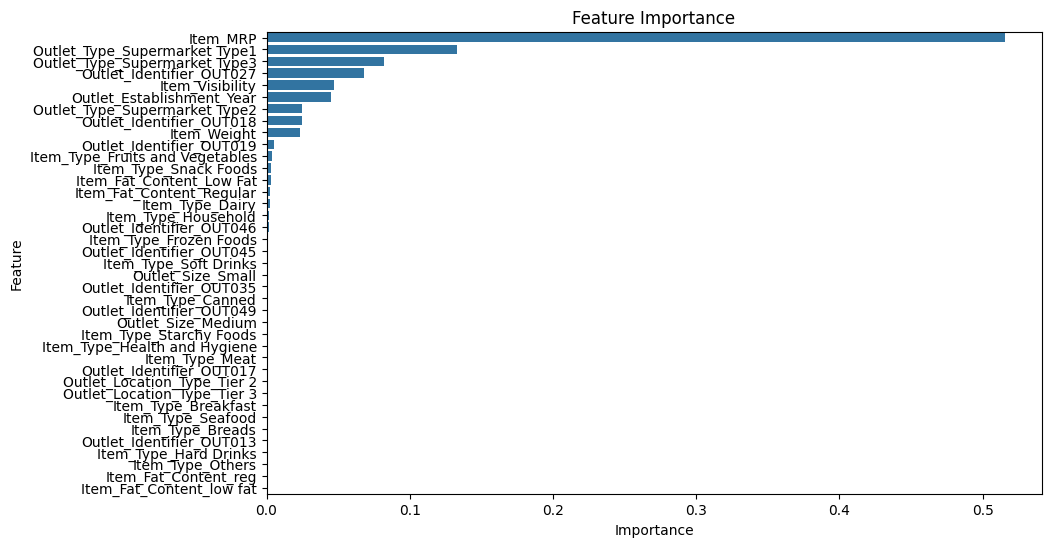

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
feature_importances = best_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance")
plt.show()

Model Deployment

In [34]:
import joblib

# Save the model
joblib.dump(best_model, 'best_rf_model.pkl')


['best_rf_model.pkl']